In [1]:
import sys

sys.path.append("/home/ptbadia/code/tfg/tfg_ttcross/tt_cross/example_notebooks/integration")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
d = [
[9300,0.8950936558181773],
[36600,0.6369308273095149],
[64775,0.6294335125447689],
[80525,0.6304322546653156],
[97425,0.6304499750567851],
[107225,0.6304708382435144],
]

ttrc64 = pd.DataFrame(d, columns=["n_samples", "integral"])

In [3]:
C64_exact = 0.630473503374386796488
mc64 = pd.read_csv("C64_data/C64_mc_numba4.csv")
mc64 = mc64[["n_samples", "integral"]]
mc64.head()

ttrc64 = pd.read_csv("C64_data/C64_ttrc_numba_5_.csv")
ttrc64 = ttrc64[["n_samples", "integral"]]
ttrc64.head()

gr64 = pd.read_csv("C64_data/C64_greedy_numba_5.csv")
gr64.head()

,n_samples,integral
0,25,0.579727
1,75,0.574147
2,125,0.572451
3,175,0.576616
4,225,0.574430


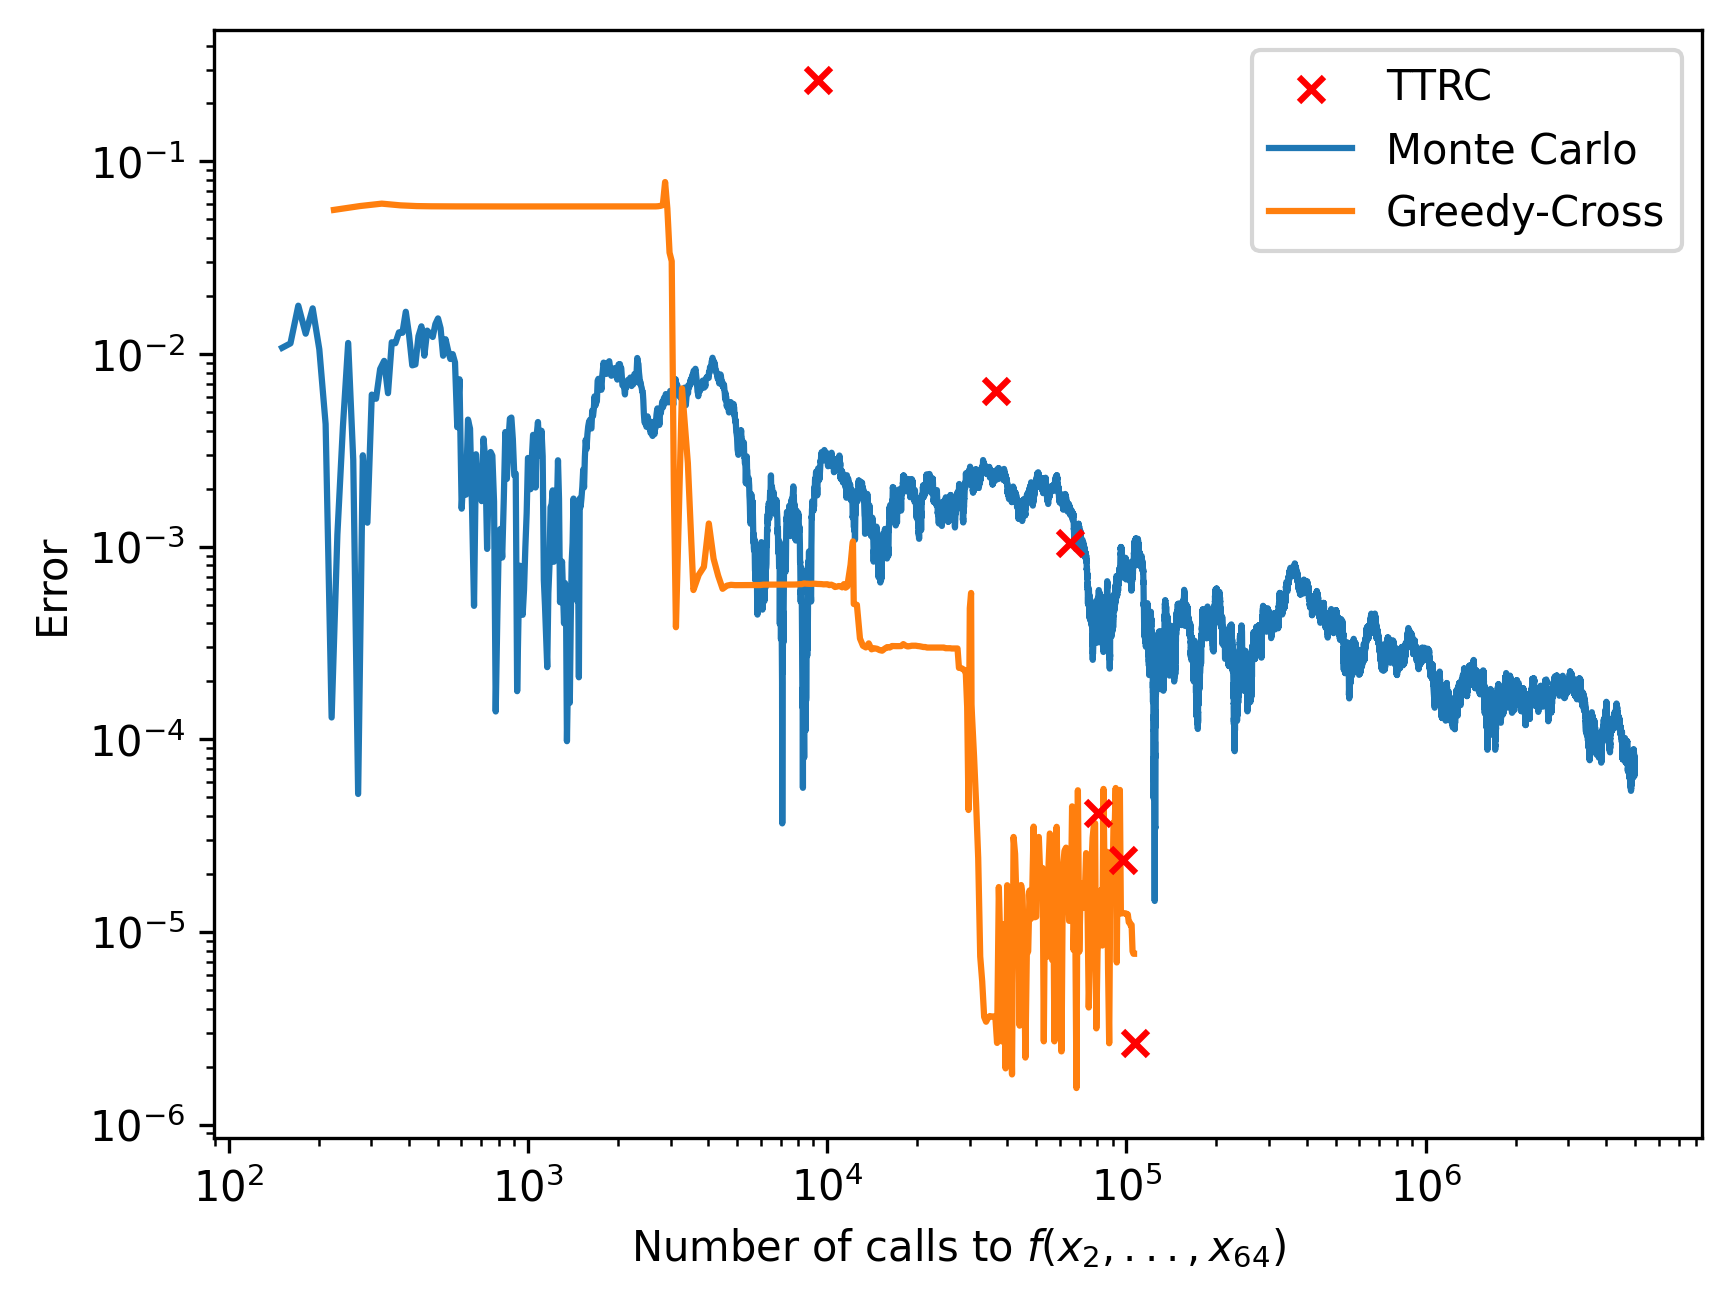

In [27]:
gr16 = pd.read_csv("C12_data/C12_greedy.csv", header=None, names=["n_samples", "integral"])
plt.figure(dpi=300)
plt.scatter(ttrc64["n_samples"], np.abs(ttrc64["integral"] - C64_exact), label="TTRC", marker="x", c="r", zorder=10)

plt.plot(mc64["n_samples"][15:], np.abs(mc64["integral"][15:] - C64_exact), label="Monte Carlo")
plt.plot(gr64["n_samples"][4:], np.abs(gr64["integral"][4:] - C64_exact), label="Greedy-Cross")
# plt.plot(gr16["n_samples"], np.abs(gr16["integral"] - exact), label="Greedy")
plt.xlabel("Number of calls to $f(x_2,...,x_{64})$")
plt.legend()
plt.yscale("log")
plt.xscale("log")

plt.ylabel("Error")
plt.savefig("C64_errors.png")